In [26]:
access_token = ""
access_token_secret = ""
consumer_key = ""
consumer_secret = ""

import tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [27]:
def access(access_token, access_secret, cons_key, cons_secret):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    return tweepy.API(auth)

def home_timeline(api):
    return api.home_timeline()



In [28]:
tweets=api.home_timeline()

In [29]:
tweets = home_timeline(api)

In [30]:
tweets[0]

Status(contributors=None, truncated=False, text=u'Today at #didainfo we speak of geolocalised tweets, such as this one!', is_quote_status=False, in_reply_to_status_id=None, id=722711692828872704, favorite_count=0, _api=<tweepy.api.API object at 0x108941490>, author=User(follow_request_sent=False, has_extended_profile=False, profile_use_background_image=True, _json={u'follow_request_sent': False, u'has_extended_profile': False, u'profile_use_background_image': True, u'default_profile_image': False, u'id': 111435489, u'profile_background_image_url_https': u'https://abs.twimg.com/images/themes/theme1/bg.png', u'verified': False, u'profile_text_color': u'333333', u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/676210683/d1picc_normal.jpg', u'profile_sidebar_fill_color': u'DDEEF6', u'entities': {u'description': {u'urls': []}}, u'followers_count': 65, u'profile_sidebar_border_color': u'C0DEED', u'id_str': u'111435489', u'profile_background_color': u'C0DEED', u'listed_count

In [31]:
print(tweets[0].text)

Today at #didainfo we speak of geolocalised tweets, such as this one!


In [32]:
me = api.me()
 
print('Name: ' + me.name)
print('Location: ' + me.location)

Name: Dario Malchiodi
Location: Milano, Italy


In [33]:
me = api.get_user('dariomalchiodi')

In [34]:
print me.screen_name
print me.followers_count

dariomalchiodi
65


In [35]:
followers_ids = me.followers_ids()
[f.name for f in me.followers()]

[u'Imran Zazza',
 u'Sylvia Englisch',
 u'Alessio',
 u'Terri Lynne',
 u'esther valzano',
 u'Paola Serra',
 u'Astor99',
 u'landrada',
 u'Federico Maggi',
 u'Corrado Monti',
 u'Autonomous',
 u'MarcoGenuzio',
 u'piri picchio',
 u'Leonardo Medici',
 u'Anton Kojin',
 u'Lorenzo Rossi',
 u'Andrea Pirola',
 u'Cristian Fompowou',
 u'Raffaella Migliaccio',
 u'E-Ludo Lab']

In [36]:
from IPython.display import Image
img=Image(me.profile_image_url)

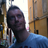

In [37]:
img

In [38]:
me._json['name']

u'Dario Malchiodi'

In [39]:
me._json

{u'contributors_enabled': False,
 u'created_at': u'Thu Feb 04 22:45:14 +0000 2010',
 u'default_profile': True,
 u'default_profile_image': False,
 u'description': u'A man with a can on a LAN.',
 u'entities': {u'description': {u'urls': []}},
 u'favourites_count': 1,
 u'follow_request_sent': False,
 u'followers_count': 65,
 u'following': False,
 u'friends_count': 60,
 u'geo_enabled': True,
 u'has_extended_profile': False,
 u'id': 111435489,
 u'id_str': u'111435489',
 u'is_translation_enabled': False,
 u'is_translator': False,
 u'lang': u'en',
 u'listed_count': 0,
 u'location': u'Milano, Italy',
 u'name': u'Dario Malchiodi',
 u'needs_phone_verification': False,
 u'notifications': False,
 u'profile_background_color': u'C0DEED',
 u'profile_background_image_url': u'http://abs.twimg.com/images/themes/theme1/bg.png',
 u'profile_background_image_url_https': u'https://abs.twimg.com/images/themes/theme1/bg.png',
 u'profile_background_tile': False,
 u'profile_image_url': u'http://pbs.twimg.com/prof

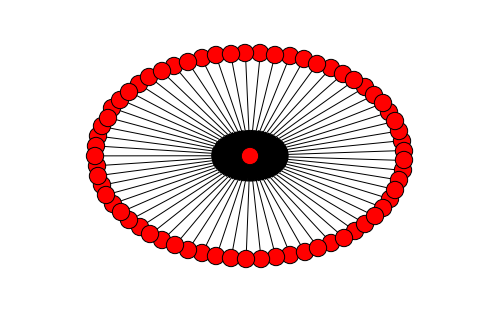

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.DiGraph()

for id in followers_ids:
    G.add_edge(id, me.id)
    #f_followers_ids = f.followers_ids()
    #for ff in f_followers_ids:
    #   G.add_edge(ff, f.id)


nx.draw(G)

In [41]:
def status(follower):
    try:
        return follower.status.text
    except AttributeError:
        return ''

In [42]:
followers = me.followers()
longest_length = 0
longest_status = ''
for f in followers:
    length = len(status(f))
    if length > longest_length:
        longest_length = length
        longest_status = status(f)

print longest_status

RT @nytimesbits: Cryptography pioneers Martin Hellman &amp; Whitfield Diffie (shown in 1977) win Turing Award https://t.co/YtweTfASCk https://t…


In [43]:
shortest_length = 200
shortest_status = ''
for f in followers:
    length = len(status(f))
    if length > 0 and length < shortest_length:
        shortest_length = length
        shortest_status = status(f)

print shortest_status

don't alwiys take no for ai answer


In [44]:
me.status.entities['hashtags']

[{u'indices': [9, 18], u'text': u'didainfo'}]

In [45]:
unimi = api.get_user('LaStatale')

hashtags = {}

for s in api.user_timeline(unimi.id, count=100):
    for h in s.entities['hashtags']:
        if h['text'] in hashtags:
            hashtags[h['text']] += 1
        else:
            hashtags[h['text']] = 1

print hashtags

{u'LucaRonconi': 2, u'Universit\xe0itinerante': 1, u'iscrizioni': 1, u'RitaLeviMontalcini': 2, u'corruzione': 1, u'Cinisi': 1, u'lombardia': 1, u'sistema': 1, u'Orchestra': 1, u'Asinara': 1, u'BeppeSala': 1, u'streaming': 1, u'navigazione': 1, u'Ronconi': 3, u'portale': 1, u'GaetanoManfredi': 4, u'IsaiaSales': 4, u'MarcoCastelari': 1, u'mafia': 8, u'AngelaDellaBella': 1, u'mobilit\xe0': 1, u'mafie': 12, u'competitivit\xe0': 1, u'scuole': 1, u'FashionStudies': 1, u'oggi': 1, u'donne': 1, u'TV': 1, u'test': 1, u'TransparencyAwards': 1, u'Strehler': 4, u'GiuliaLazzarini': 25, u'SLAM': 1, u'leparolediRita': 1, u'400ore': 1, u'universit\xe0': 2, u'universita': 1, u'EconomiaeManagement': 1, u'UniSuorOrsonaNapoli': 1, u'DomenicoModugno': 1, u'StefanoParisi': 1, u'Ucraina': 1, u'LeparolediRita': 4, u'Milano': 2, u'CRUI': 24, u'CentroStudiComunicazioneFarmaco': 1, u'IlVolo': 1, u'investimenti': 1, u'BibliotecaStudiGiuridiciUmanistici': 1, u'antimafia': 4, u'internetday': 1, u'AulaMagna': 1, u'N

In [46]:
import operator

sorted_hashtags = sorted(hashtags.items(), key=operator.itemgetter(1), reverse=True)

print sorted_hashtags

[(u'GiuliaLazzarini', 25), (u'CRUI', 24), (u'mafie', 12), (u'ricercafutura', 9), (u'mafia', 8), (u'Brecht', 8), (u'CommAntimafia', 7), (u'GaetanoManfredi', 4), (u'IsaiaSales', 4), (u'Strehler', 4), (u'LeparolediRita', 4), (u'antimafia', 4), (u'ricerca', 4), (u'GianlucaVago', 4), (u'NandoDallaChiesa', 4), (u'Ronconi', 3), (u'LucaRonconi', 2), (u'RitaLeviMontalcini', 2), (u'universit\xe0', 2), (u'Milano', 2), (u'Universit\xe0', 2), (u'MarcoCastellari', 2), (u'UniSuorOrsolaNapoli', 2), (u'Unimi', 2), (u'AlbertoVannucci', 2), (u'NONSOLOBRECHT', 2), (u'Goldoni', 2), (u'Brecht60', 2), (u'Universit\xe0itinerante', 1), (u'iscrizioni', 1), (u'corruzione', 1), (u'Cinisi', 1), (u'lombardia', 1), (u'sistema', 1), (u'Orchestra', 1), (u'Asinara', 1), (u'BeppeSala', 1), (u'streaming', 1), (u'navigazione', 1), (u'portale', 1), (u'MarcoCastelari', 1), (u'AngelaDellaBella', 1), (u'mobilit\xe0', 1), (u'competitivit\xe0', 1), (u'scuole', 1), (u'FashionStudies', 1), (u'oggi', 1), (u'donne', 1), (u'TV', 1),

In [47]:
me.status._json

{u'contributors': None,
 u'coordinates': {u'coordinates': [9.2148413, 45.4543811], u'type': u'Point'},
 u'created_at': u'Wed Apr 20 09:01:09 +0000 2016',
 u'entities': {u'hashtags': [{u'indices': [9, 18], u'text': u'didainfo'}],
  u'symbols': [],
  u'urls': [],
  u'user_mentions': []},
 u'favorite_count': 0,
 u'favorited': False,
 u'geo': {u'coordinates': [45.4543811, 9.2148413], u'type': u'Point'},
 u'id': 722711692828872704,
 u'id_str': u'722711692828872704',
 u'in_reply_to_screen_name': None,
 u'in_reply_to_status_id': None,
 u'in_reply_to_status_id_str': None,
 u'in_reply_to_user_id': None,
 u'in_reply_to_user_id_str': None,
 u'is_quote_status': False,
 u'lang': u'en',
 u'place': {u'attributes': {},
  u'bounding_box': {u'coordinates': [[[9.040628, 45.3867262],
     [9.2780451, 45.3867262],
     [9.2780451, 45.5359644],
     [9.040628, 45.5359644]]],
   u'type': u'Polygon'},
  u'contained_within': [],
  u'country': u'Italia',
  u'country_code': u'IT',
  u'full_name': u'Milan, Lombar

In [48]:
[s.geo['coordinates'] for s in api.user_timeline(me.id) if s.geo is not None]

[[45.4543811, 9.2148413]]

In [49]:
def googlify(coordinates):
    return '%f,%f' % tuple(coordinates)

markers = '%7C'.join([googlify(s.geo['coordinates']) for s in api.user_timeline(me.id) if s.geo is not None])

url = "https://maps.googleapis.com/maps/api/staticmap?size=600x300&maptype=roadmap&markers=" + markers

from IPython.core.display import Image
Image(url=url)

In [50]:
url

'https://maps.googleapis.com/maps/api/staticmap?size=600x300&maptype=roadmap&markers=45.454381,9.214841'